In [117]:
import networkx as nx
import matplotlib.pyplot as plt

# Example triple vectors (subject, relation, object)
triples = [
    ('You', 'in', 'north stairwell'),
    ('north stairwell', 'have', 'stairs'),
    ('north stairwell', 'down', 'to down'),
    ('north stairwell', 'have', 'door'),
    ('north stairwell', 'east', 'to east'),
    ('door', 'east', 'to east'),
    ('stairs', 'with', 'dark'),
    ('stairs', 'down', 'to down'),
    ('You', 'have', 'apple')
]

def format_triple_vectors(input):
    return input.strip().replace(" ", "").lower()

# Create a directed graph (Knowledge Graph)
G = nx.DiGraph()

# Add edges based on triple vectors (subject -> object with relation as the edge label)
for subj, rel, obj in triples:
    G.add_edge(format_triple_vectors(subj), format_triple_vectors(obj), relation=format_triple_vectors(rel))


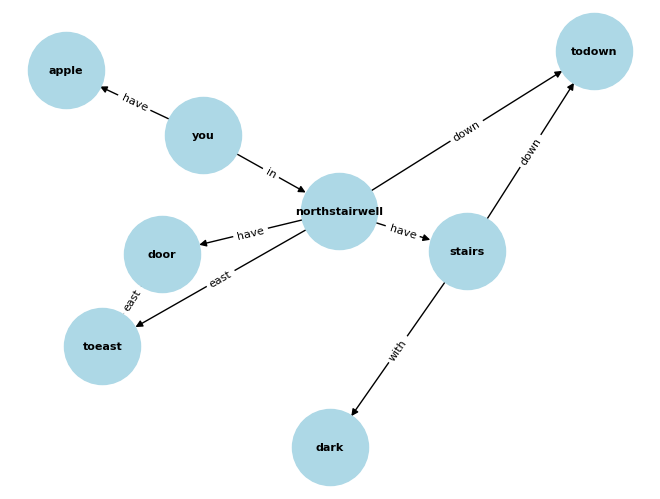

In [111]:
# Visualizing the Knowledge Graph
pos = nx.spring_layout(G, k=0.25, iterations=25)  # Layout for visualization
edge_labels = nx.get_edge_attributes(G, 'relation')

# Drawing the nodes and edges
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=8, font_weight="bold", arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, label_pos=0.5)

# Show the plot
plt.show()

In [112]:
# Save the KG to a GraphML file
nx.write_graphml(G, "data/kg/knowledge_graph.graphml")


In [118]:
# Print nodes and edges (optional)
print("Nodes in KG:", G.nodes)
print("Edges in KG:", G.edges(data=True))

Nodes in KG: ['you', 'northstairwell', 'stairs', 'todown', 'door', 'toeast', 'dark', 'apple']
Edges in KG: [('you', 'northstairwell', {'relation': 'in'}), ('you', 'apple', {'relation': 'have'}), ('northstairwell', 'stairs', {'relation': 'have'}), ('northstairwell', 'todown', {'relation': 'down'}), ('northstairwell', 'door', {'relation': 'have'}), ('northstairwell', 'toeast', {'relation': 'east'}), ('stairs', 'dark', {'relation': 'with'}), ('stairs', 'todown', {'relation': 'down'}), ('door', 'toeast', {'relation': 'east'})]


In [119]:
# Query KG for edges related to "north stairwell"
def query_kg(graph, node_a, node_b=None):
    node_a = format_triple_vectors(node_a)
    node_b = format_triple_vectors(node_b)

    if node_b is None:
        if node_a not in graph: return []
        # Query for a single node
        return [(u, d['relation'], v) for u, v, d in graph.edges(data=True) if u == node_a or v == node_a]
    else:
        if node_a not in graph or node_b not in graph: return []
        # Query for two nodes
        return [(u, d['relation'], v) for u, v, d in graph.edges(data=True) 
                if (u == node_a or u == node_b) and (v == node_a or v == node_b)]


In [120]:
# Example query
results = query_kg(G, "You", "north stairwell")
print("Query results:", results)

Query results: [('you', 'in', 'northstairwell')]


In [ ]:
# Adding a new triple:
def add_triple(graph, subject, relation, obj):
    graph.add_edge(subject, obj, relation=relation)
    print(f"Added triple: ({subject}, {relation}, {obj})")

# Removing triple from graph
def remove_triple(graph, subject, relation, obj):
    if graph.has_edge(subject, obj):
        graph.remove_edge(subject, obj)
        print(f"Removed triple: ({subject}, {relation}, {obj})")
    else:
        print("Triple not found in the KG.")

# Updating current graph
def update_relation(graph, subject, new_relation, obj):
    if graph.has_edge(subject, obj):
        graph[subject][obj]['relation'] = new_relation
        print(f"Updated relation between {subject} and {obj} to: {new_relation}")
    else:
        print("Edge not found in the KG.")


 ## TODO: Test dynamicly updating KG

# <s>Integrating NetworkX KG with Haystack</s> (not need)
To integrate **NetworkX** with **Haystack**, you can create a custom retriever that queries the KG using NetworkX and returns the relevant triples to the LLM.


## Custom Retriever Example:
Here’s an example of a custom retriever for Haystack that queries the NetworkX-based KG:

In [ ]:
%%markdown
from haystack. import 

class NetworkXRetriever(BaseRetriever):
    def __init__(self, graph):
        super().__init__()
        self.graph = graph

    def retrieve(self, query, top_k=5):
        # Here, you can customize how to interpret and match the query
        results = query_kg(self.graph, query)
        return results



In [ ]:
%%markdown
# Initialize retriever
retriever = NetworkXRetriever(G)

# Retrieve relevant triples for "north stairwell"
retrieve_item = "north stairwell"
results = retriever.retrieve(format_triple_vectors(retrieve_item))
print("Retrieved results:", results)